# Parameters Sweep Analysis

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

In [16]:
import matplotlib.colors as colors
import matplotlib.transforms as mtrans

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

matplotlib.rc('font', **font)

**Generate plot across axis**

In [7]:
Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [8]:
sorted_cvs_files_expected = [f"../matlab/data/expected/clean_S_{S}_T_{T}_stochastic_0.csv" for S in Ss for T in Ts]

In [43]:
over_ps, over_qs = [], []

for i, file in enumerate(sorted_cvs_files_expected):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps.append(ps), over_qs.append(qs)

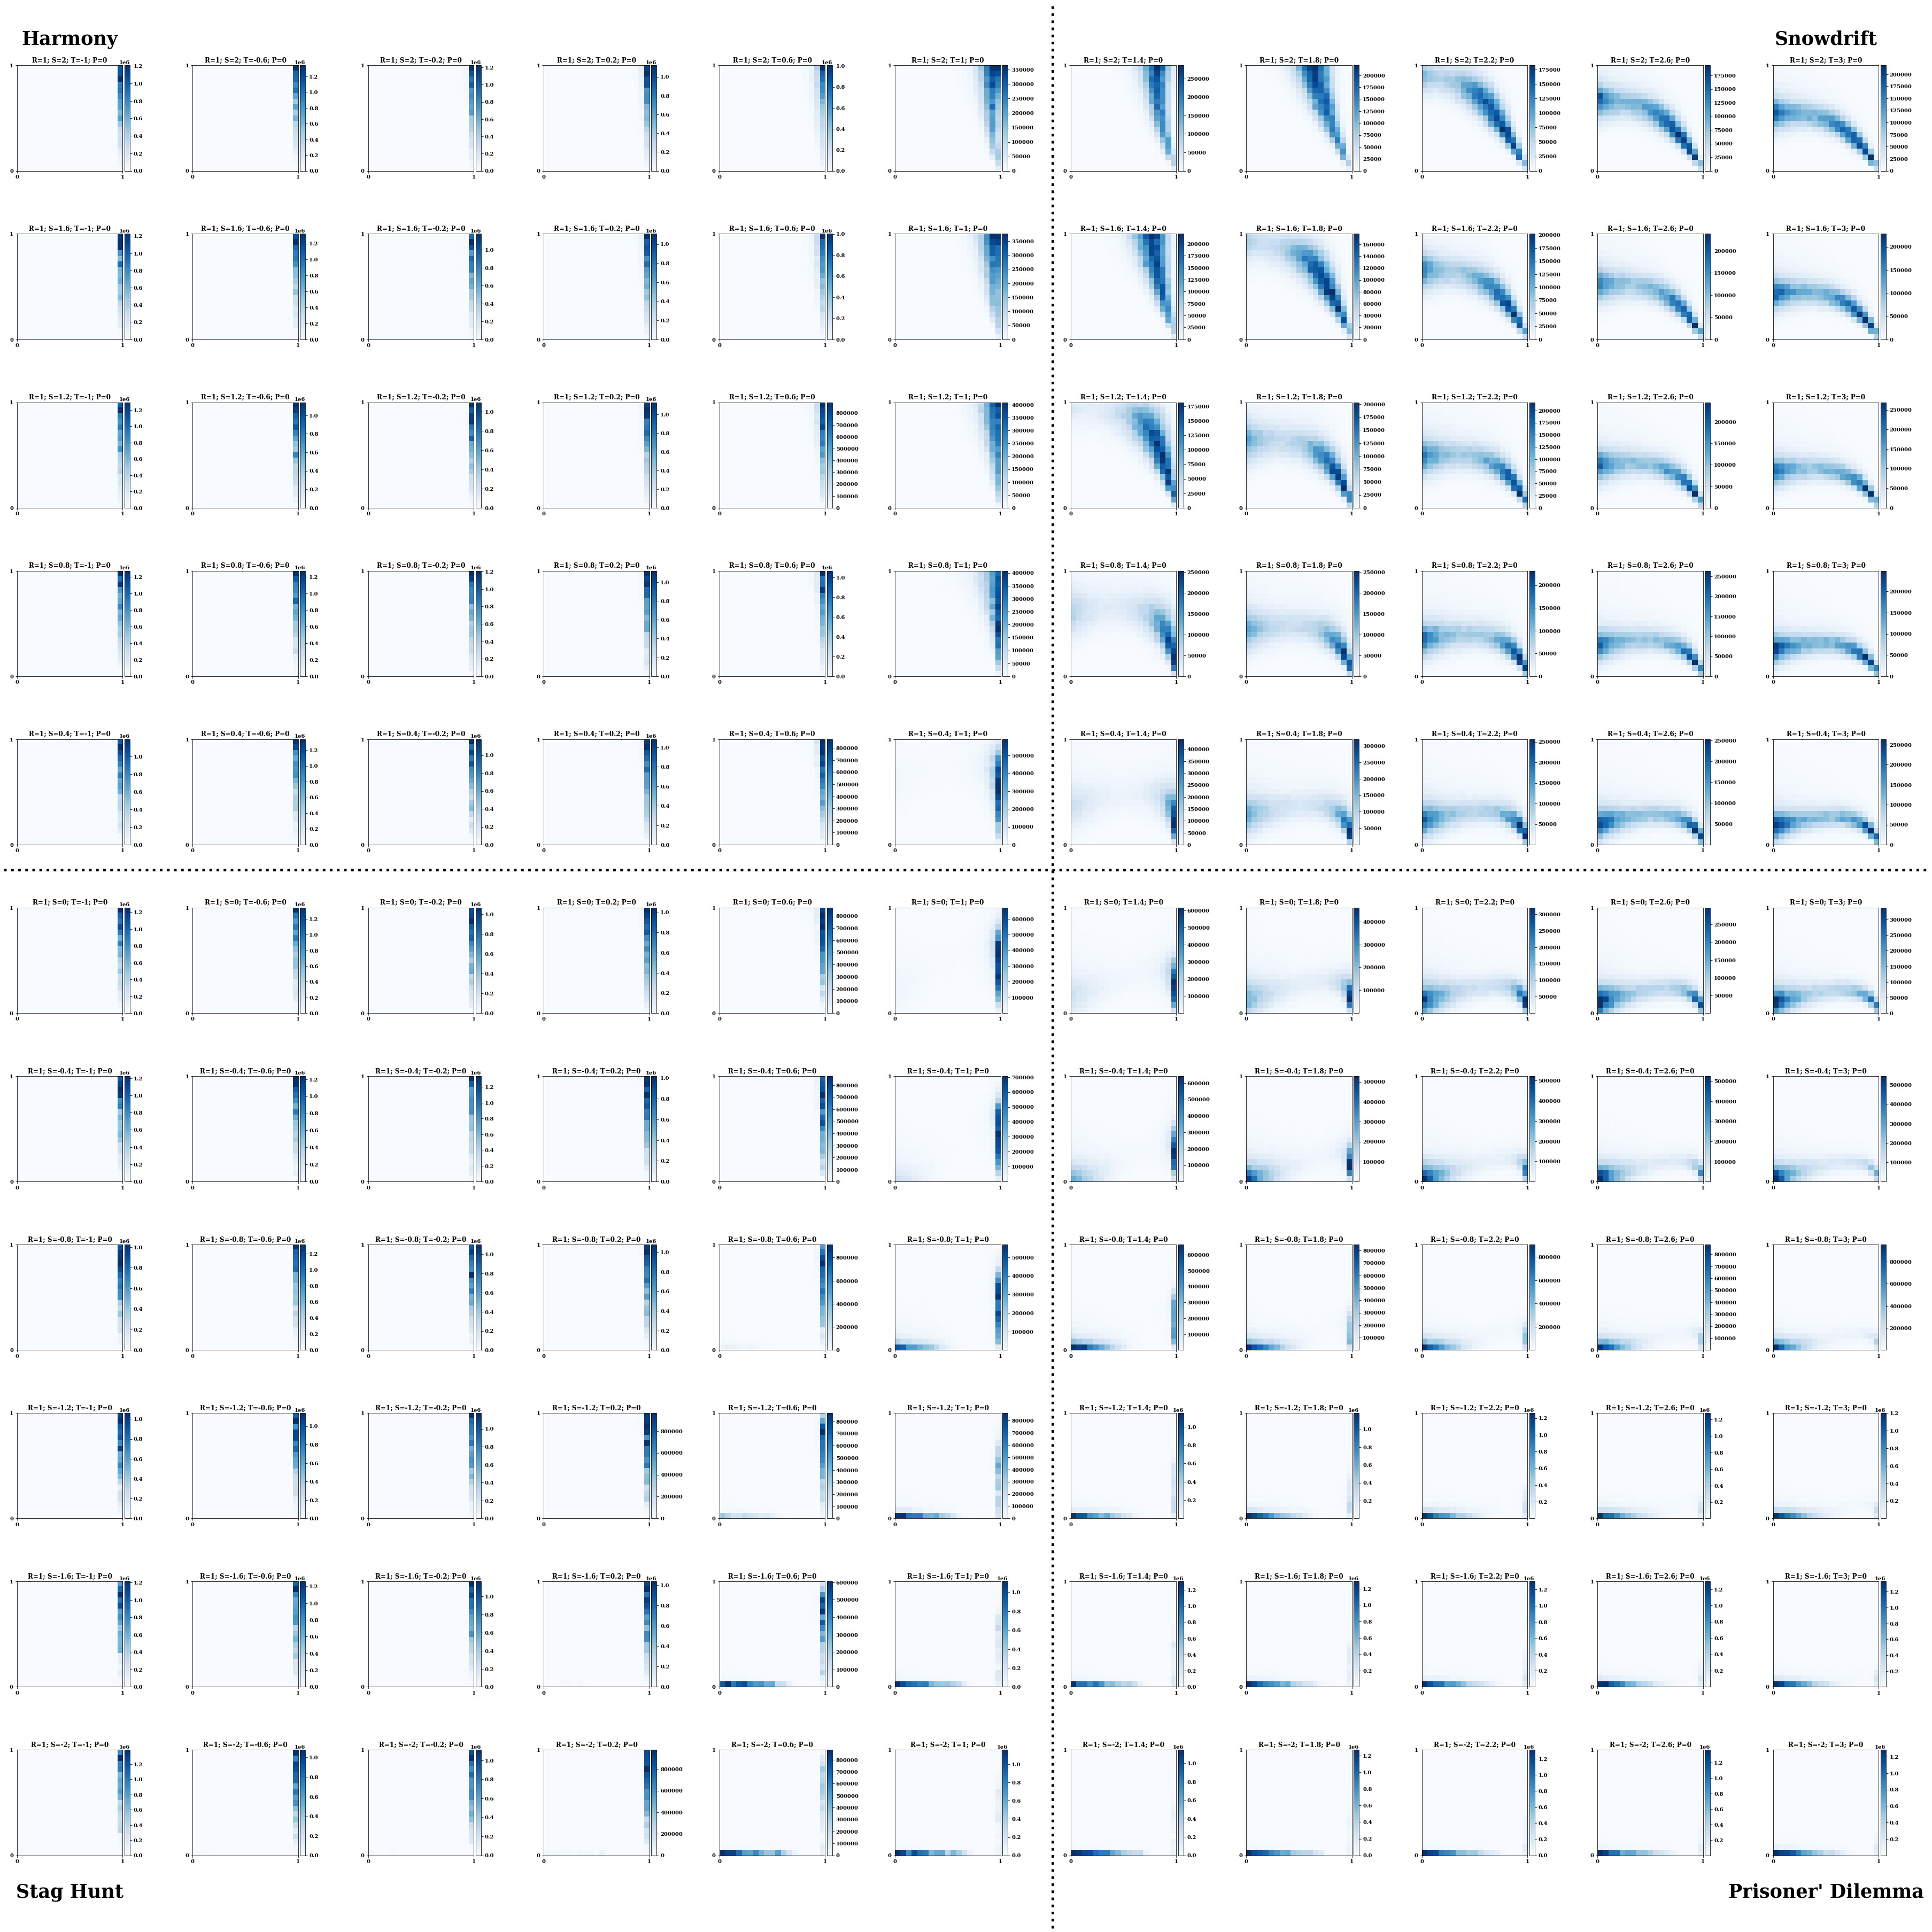

In [46]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_expected):
    
    text_file = open((file[:24] + file[30:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps[i], over_qs[i]
    
    title = data[0].replace(",", "")[:-44]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[0])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold")

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    

h_line = plt.Line2D([0.545, 0.545],[0, 1], transform=fig.transFigure, color="black", linewidth=5, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.55, .55], transform=fig.transFigure, color="black", linewidth=5, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", size=35, transform=axes[0, 0].transAxes, ha="center")
axes[0, -1].text(0.5, 1.2, "Snowdrift", size=35, transform=axes[0, -1].transAxes, ha="center")
axes[-1, -1].text(0.5, -.4, "Prisoner' Dilemma", size=35, transform=axes[-1, -1].transAxes, ha="center")
axes[-1, 0].text(0.5, -.4, "Stag Hunt", size=35, transform=axes[-1, 0].transAxes, ha="center")

plt.tight_layout()
fig.savefig("../static/expected_two_by_two_games.pdf", bbox_inches='tight')

**Similar for stochastic payoffs**

In [47]:
sorted_cvs_files_stochastic = [f"../matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

In [48]:
over_ps_stoch, over_qs_stoch = [], []

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_stoch.append(ps), over_qs_stoch.append(qs)

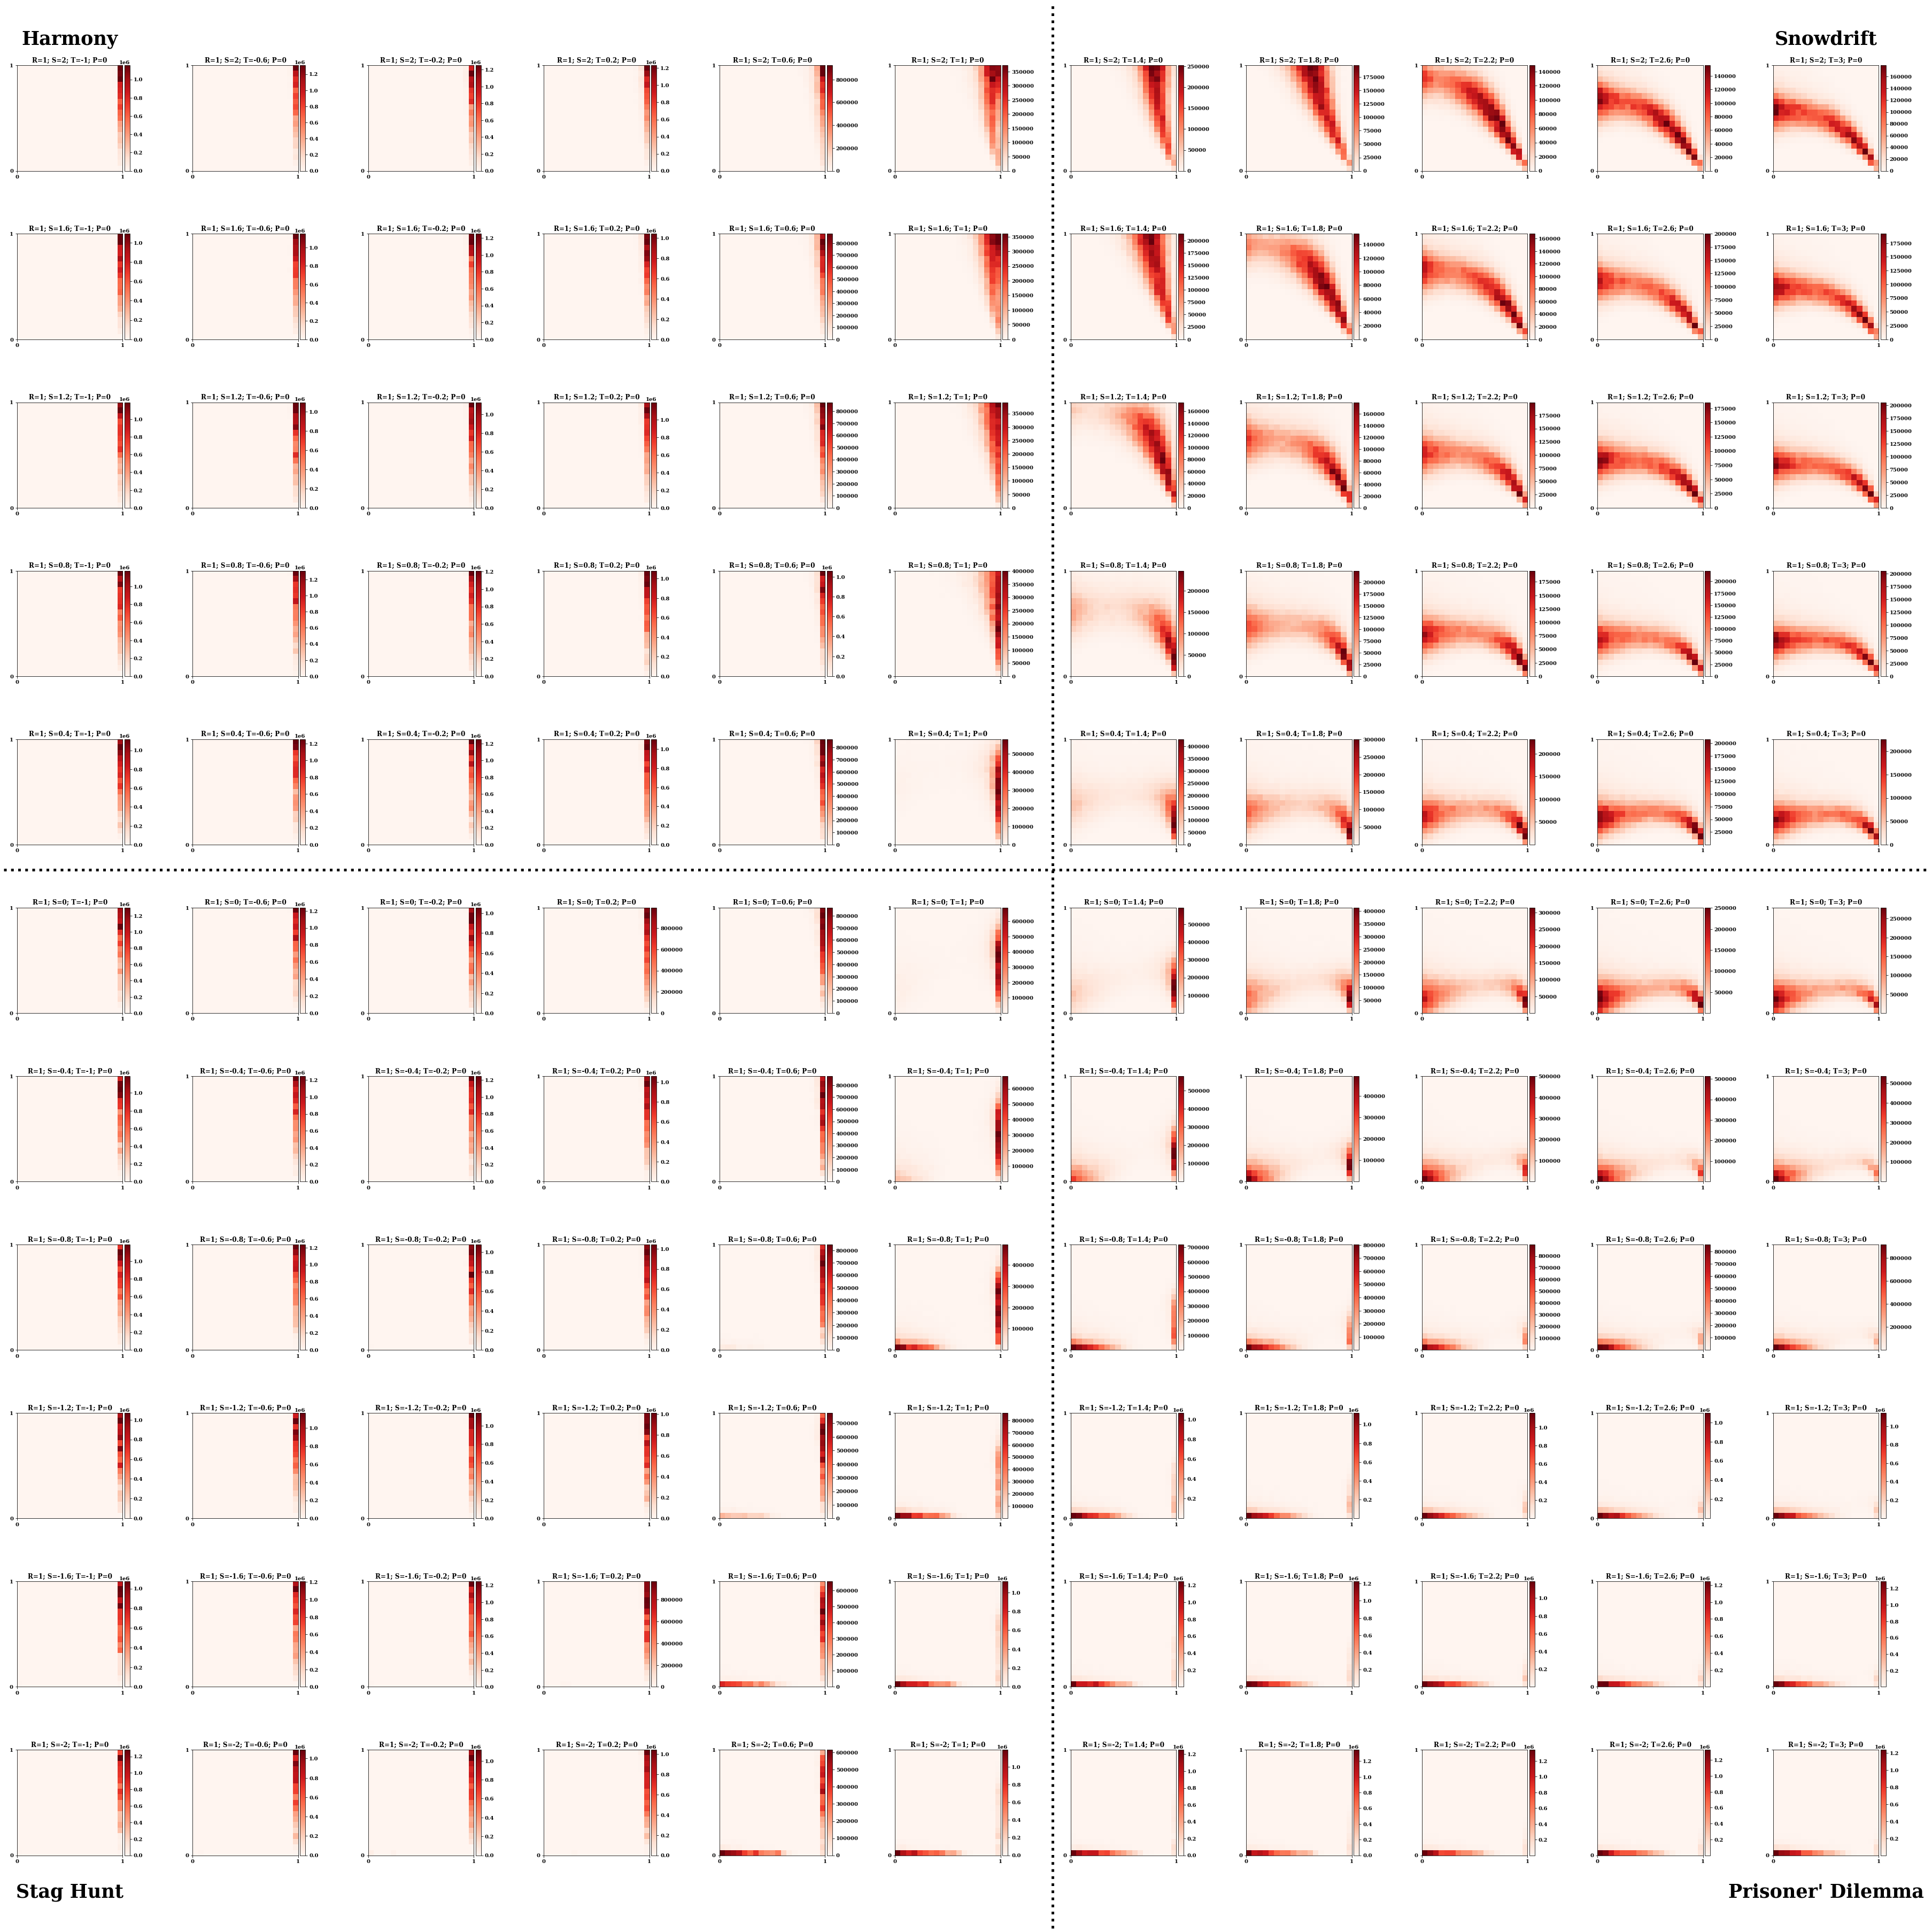

In [49]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    text_file = open((file[:26] + file[32:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_stoch[i], over_qs_stoch[i]
    
    title = data[0].replace(",", "")[:-44]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[1])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold")

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

h_line = plt.Line2D([0.545, 0.545],[0, 1], transform=fig.transFigure, color="black", linewidth=5, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.55, .55], transform=fig.transFigure, color="black", linewidth=5, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", size=35, transform=axes[0, 0].transAxes, ha="center")
axes[0, -1].text(0.5, 1.2, "Snowdrift", size=35, transform=axes[0, -1].transAxes, ha="center")
axes[-1, -1].text(0.5, -.4, "Prisoner' Dilemma", size=35, transform=axes[-1, -1].transAxes, ha="center")
axes[-1, 0].text(0.5, -.4, "Stag Hunt", size=35, transform=axes[-1, 0].transAxes, ha="center")

plt.tight_layout()
fig.savefig("../static/stochastic_two_by_two_games.pdf", bbox_inches='tight')

**Round Two**

In [138]:
sorted_cvs_files_rounds = [f"../matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [123]:
over_ps_rounds, over_qs_rounds = [], []

for i, file in enumerate(sorted_cvs_files_rounds):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_rounds.append(ps), over_qs_rounds.append(qs)

In [141]:
file = sorted_cvs_files_rounds[16]

In [143]:
file[:25] + file[31:]

'../matlab/data/round_two/S_1.6_T_1.csv'

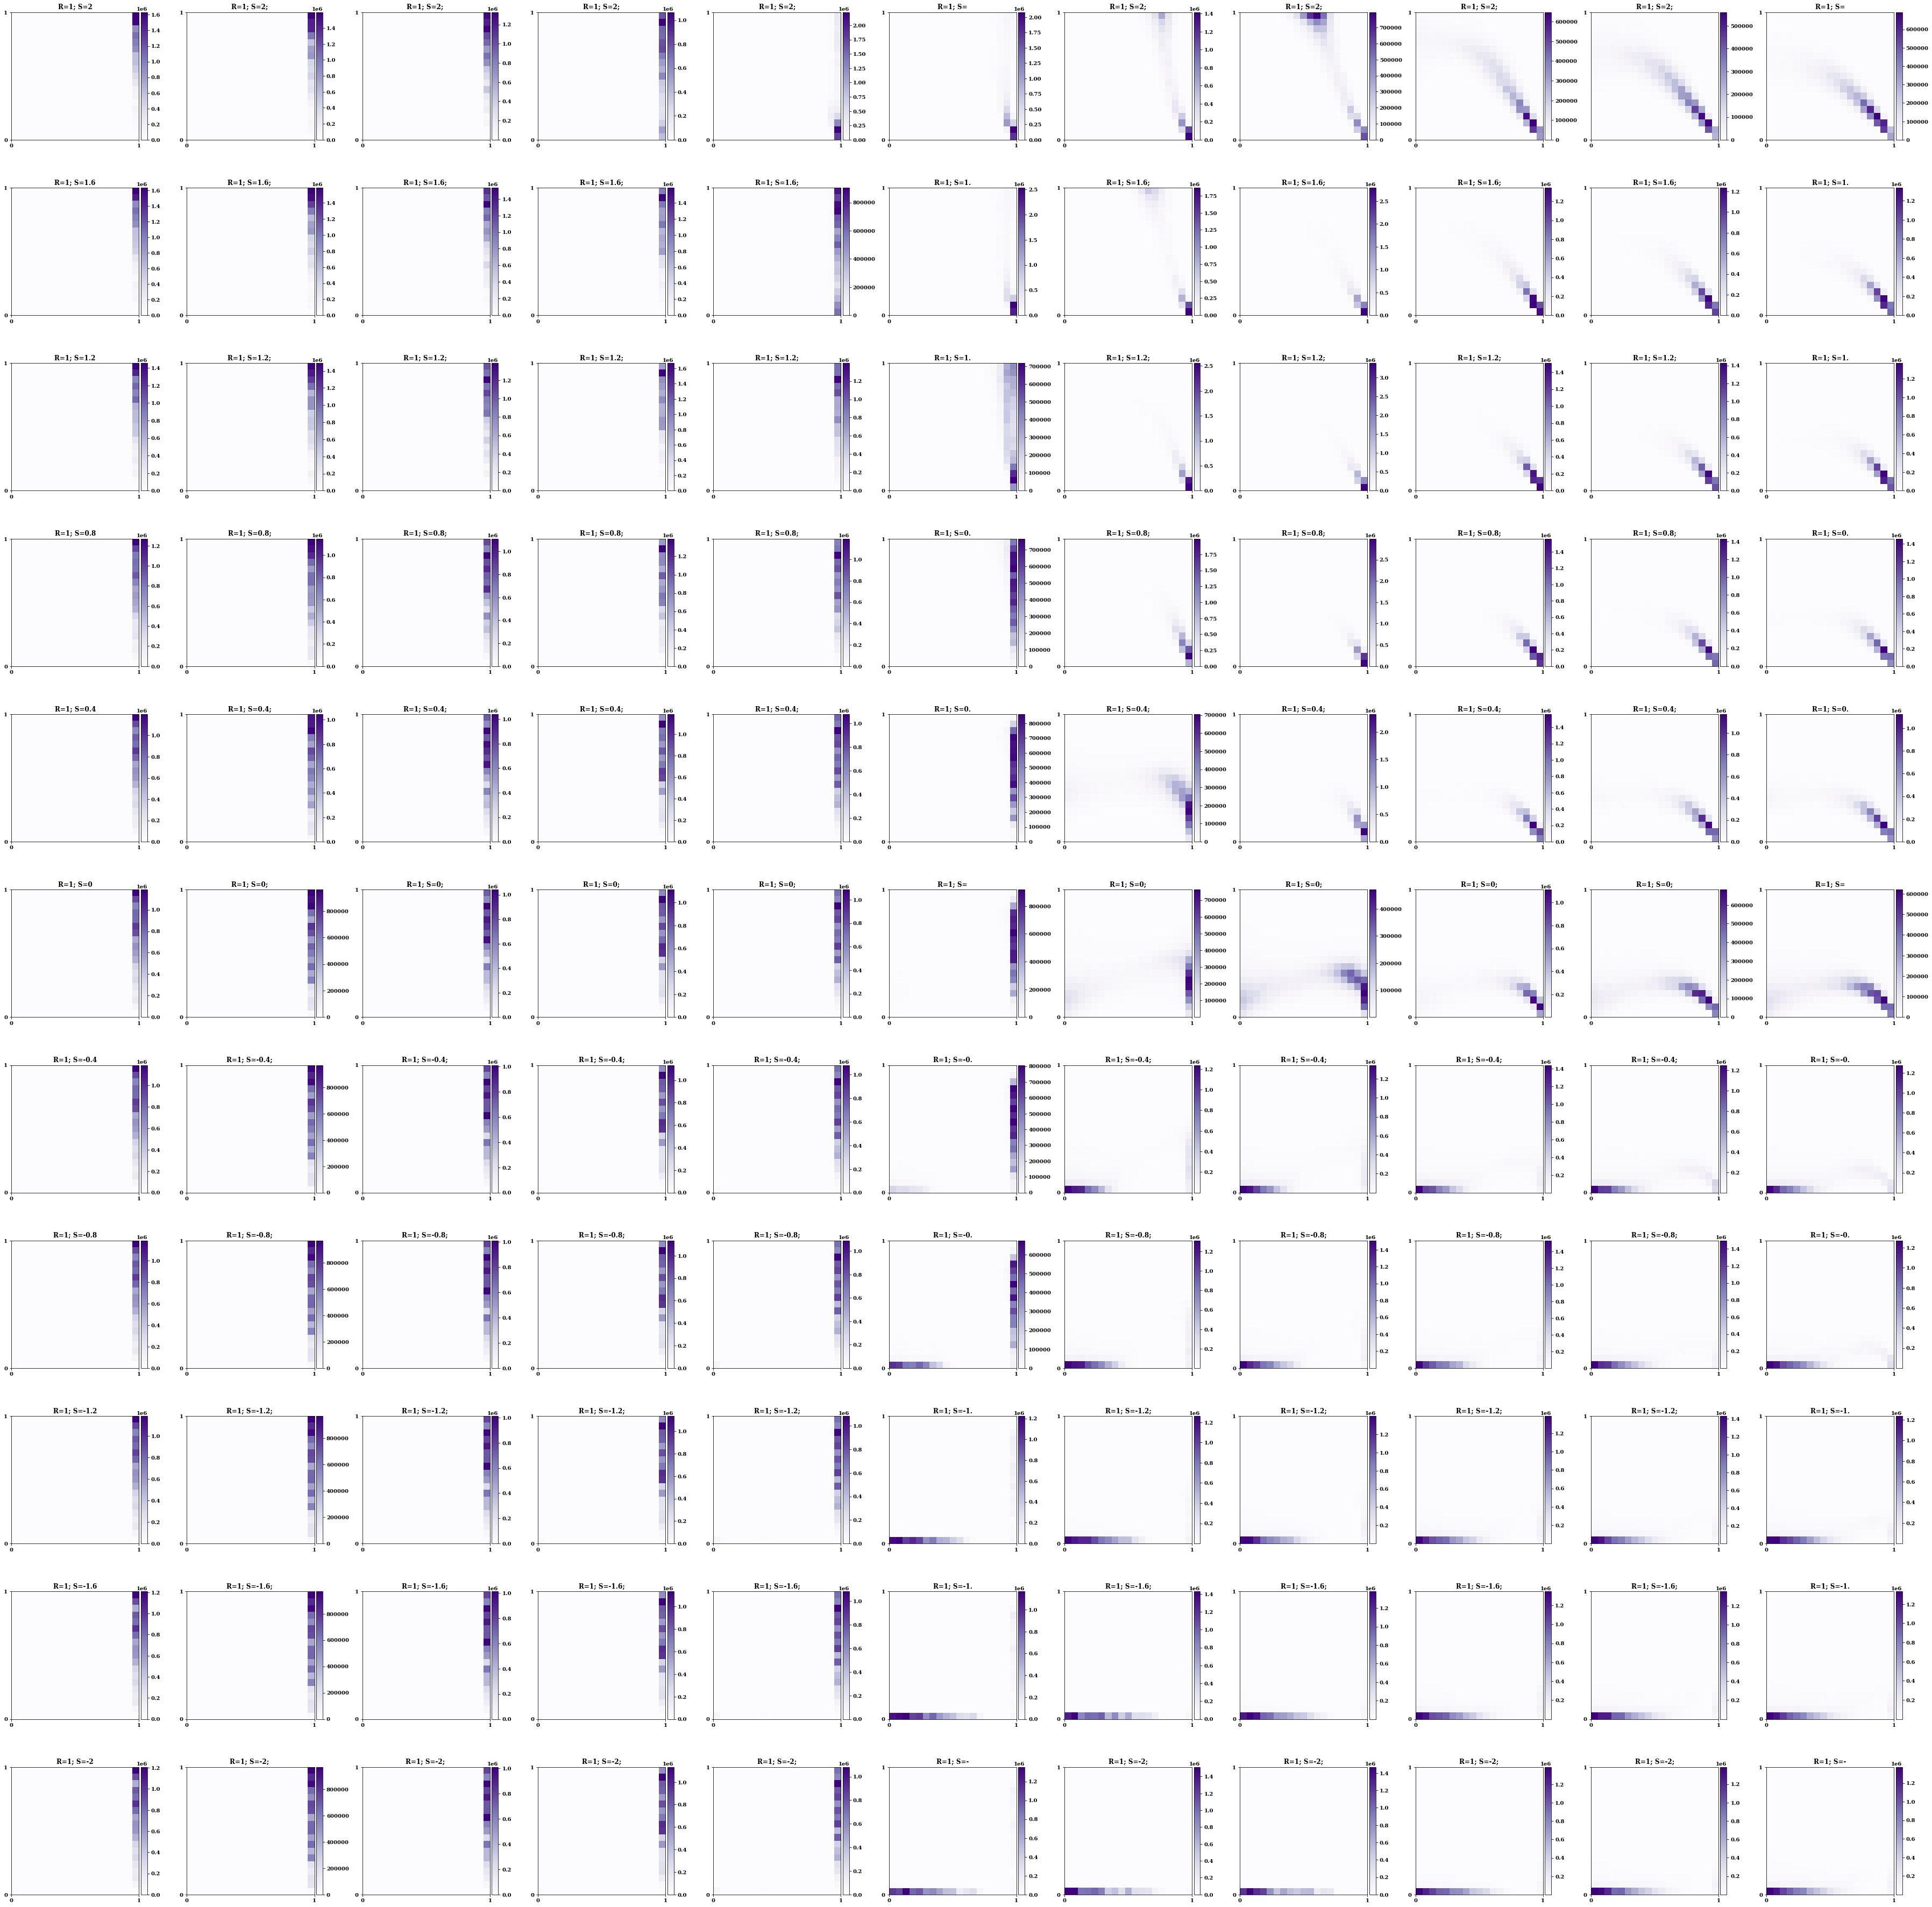

In [150]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_rounds):
    
    text_file = open((file[:25] + file[31:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_rounds[i], over_qs_rounds[i]
    
    title = data[0].replace(",", "")[:-42]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[-1])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold")

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout()
    

fig.savefig("../static/rounds_two_by_two_games.pdf", bbox_inches='tight')

**Opponents**

In [78]:
sorted_cvs_files_opponents = [f"../matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [79]:
over_ps_opp, over_qs_opp = [], []

for i, file in enumerate(sorted_cvs_files_opponents):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_opp.append(ps), over_qs_opp.append(qs)

In [99]:
file[:26] + file[32:]

'../matlab/data/stochastic/S_2_T_-1_stochastic_1.csv'

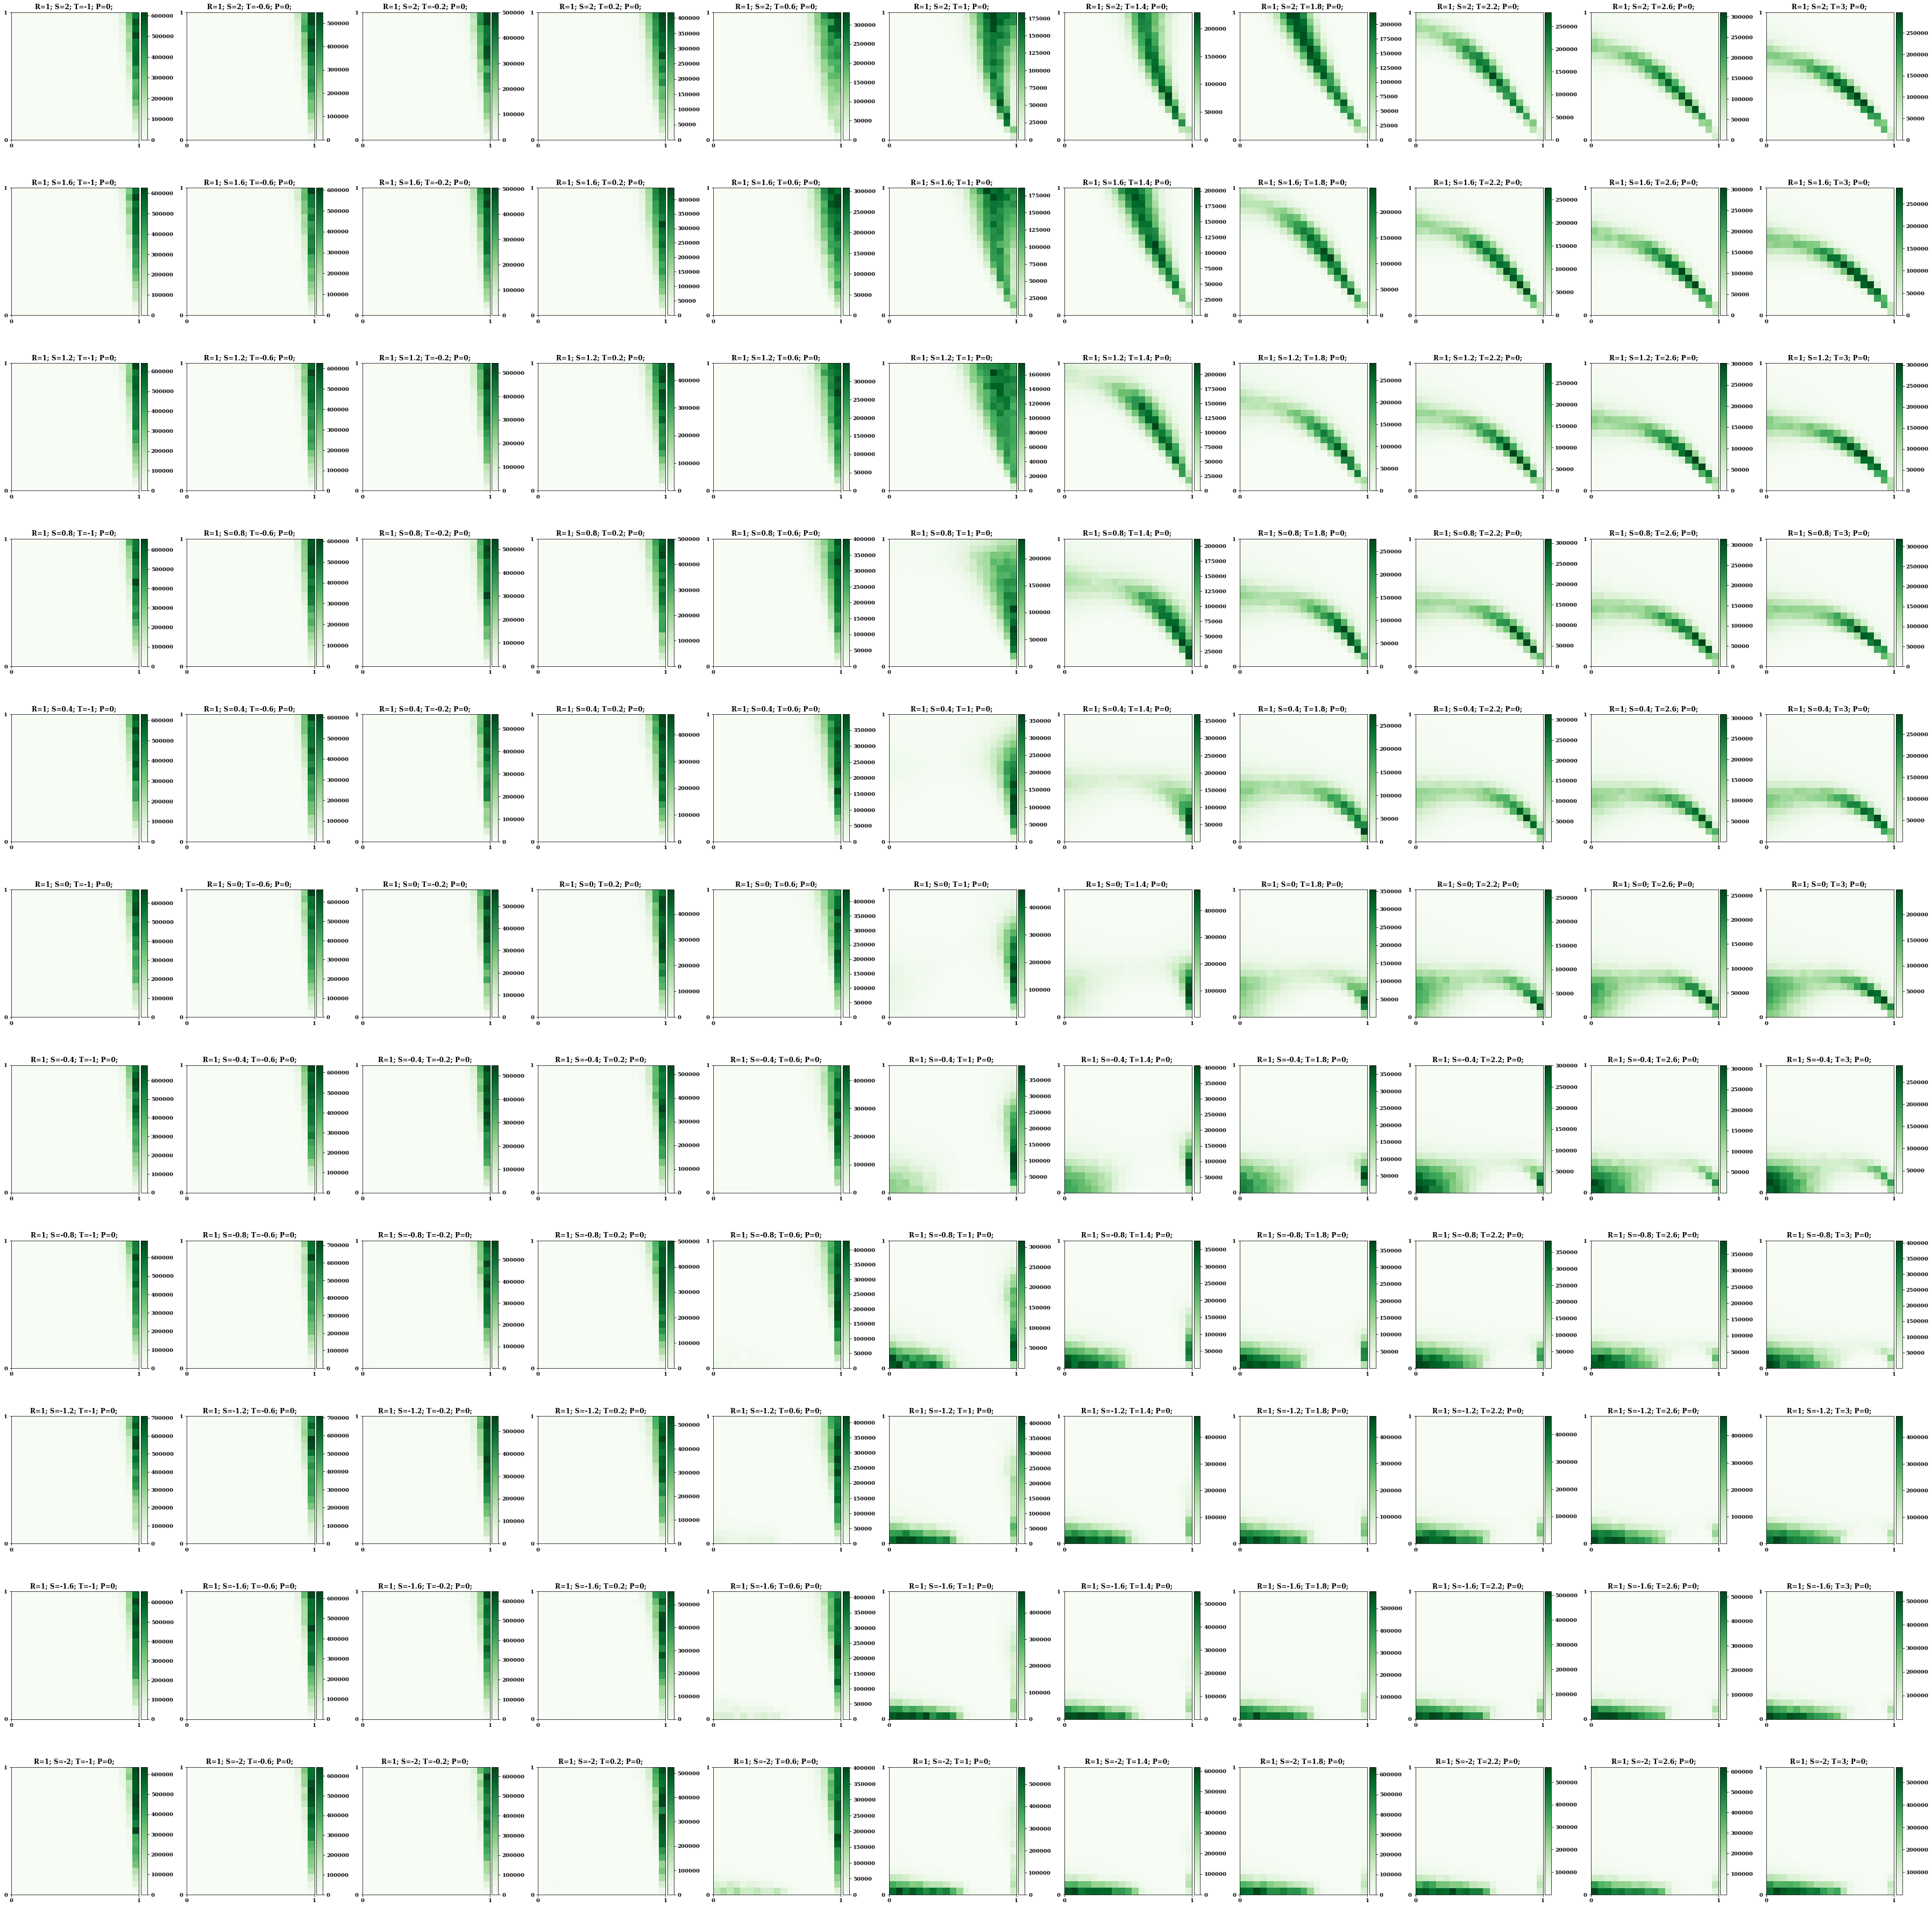

In [147]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    text_file = open((file[:26] + file[32:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_opp[i], over_qs_opp[i]
    
    title = data[0].replace(",", "")[:-42]
    
    index = (int(i / 11), i % 11)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[2])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold")

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

plt.tight_layout()
fig.savefig("../static/opponents_two_by_two_games.pdf", bbox_inches='tight')

**Rounds - opponents**

In [17]:
csv_files = glob.glob('matlab/data/rounds_opponents_two/S*csv')

In [18]:
columns = ['y', 'p', 'q', "average cooperation rate", 't']

In [20]:
# for file in tqdm.tqdm_notebook(csv_files):    
#     df = pd.read_csv(file, header=None)
#     df = df.drop_duplicates()
#     df.columns = columns
    
#     frequencies = []
#     previous = 0
#     for value in df['t'][1:]:
#         frequencies.append(value - previous)
#         previous = value
#     frequencies.append(10 ** 7 - previous)
    
#     df['frequencies'] = frequencies
    
#     df.to_csv(f"matlab/data/rounds_opponents_two/clean_{file[33:]}", index=False)

In [ ]:
sorted_cvs_files = [f"matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [ ]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    try:
        df = dd.read_csv(file)
        
        text_file = open(file.replace("csv", "txt").replace("clean_", ""), "r")
        data = text_file.readlines()

        ps = df['p'].values.compute()
        qs = df['q'].values.compute()
        title = data[0].replace(",", "")[:-29]

        index = (int(i / 11), i % 11)

        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(title)

        axes[index].set_xticks(np.linspace(0, 1, 2))
        axes[index].set_yticks(np.linspace(0, 1, 2))
    
    except FileNotFoundError:
        pass
    

fig.savefig("matlab/images/merged_plot_rounds_opponents_two.pdf")